## Polygon Environment Building
Devising scenarios for the polygon-based environments.

In [13]:
%load_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
from plot_stats import plot_planner_stats, plot_smoother_stats
from utils import latexify
from table import latex_table
from definitions import *
import matplotlib as mpl
import sys, os
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
from copy import deepcopy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Polygon Environments

Running MPB with ID test_parking2 (log file at test_parking2.log)...


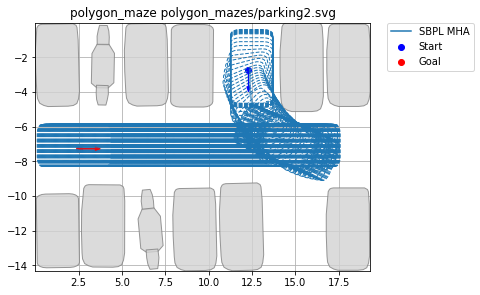

+++++++++++++++++++++++++ Run #0 (1 / 1) +++++++++++++++++++++++++
+ Steering:        CC Reeds-Shepp 
+ Environment:     polygon_maze polygon_mazes/parking2.svg
+ Planners:        SBPL_MHA
+ Found solution:  1 / 1
+ Exact solution:  1 / 1
+ Found colliding: 0 / 1
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Running MPB with ID test_parking2 (log file at test_parking2.log)...


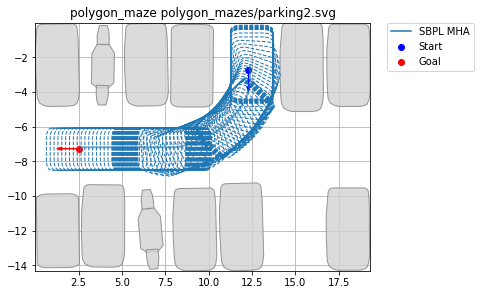

+++++++++++++++++++++++++ Run #0 (1 / 1) +++++++++++++++++++++++++
+ Steering:        CC Reeds-Shepp 
+ Environment:     polygon_maze polygon_mazes/parking2.svg
+ Planners:        SBPL_MHA
+ Found solution:  1 / 1
+ Exact solution:  1 / 1
+ Found colliding: 0 / 1
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [27]:
def visualize(scenario: str, start: {str: float}, goal: {str: float}, robot_model: str = None):
    m = MPB()
    m["max_planning_time"] = 60
    m["env.start"] = start
    m["env.goal"] = goal
    m["env.type"] = "polygon"
    m["env.polygon.source"] = "polygon_mazes/%s.svg" % scenario
    if robot_model:
        print("Using robot model %s." % robot_model)
        m["env.collision.robot_shape_source"] = robot_model
    m.set_planners(['informed_rrt_star'])
    m.set_planners(["sbpl_mha"])
    m["sbpl.scaling"] = 1
    if m.run(id="test_%s" % scenario, runs=1) == 0:
        m.visualize_trajectories(draw_start_goal_thetas=True, plot_every_nth_polygon=1, silence=True)
        m.print_info()
    
visualize("parking2",
          {"theta": -1.57, "x": 12.3, "y": -2.73},
          {"theta": 0, "x": 2.5, "y": -7.27})
visualize("parking2",
          {"theta": -1.57, "x": 12.3, "y": -2.73},
          {"theta": 3.14, "x": 2.5, "y": -7.27})

Using robot model polygon_mazes/warehouse_robot.svg.
Running MPB with ID test_warehouse (log file at test_warehouse.log)...


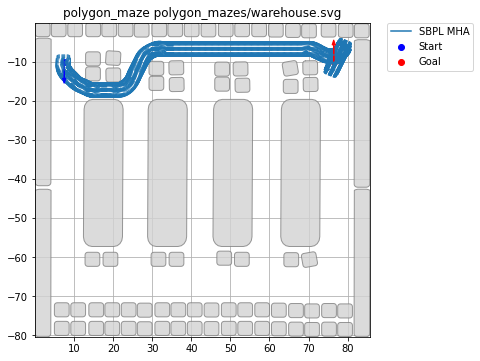

+++++++++++++++++++++++++ Run #0 (1 / 1) +++++++++++++++++++++++++
+ Steering:        CC Reeds-Shepp 
+ Environment:     polygon_maze polygon_mazes/warehouse.svg
+ Planners:        SBPL_MHA
+ Found solution:  1 / 1
+ Exact solution:  1 / 1
+ Found colliding: 0 / 1
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Using robot model polygon_mazes/warehouse_robot.svg.
Running MPB with ID test_warehouse2 (log file at test_warehouse2.log)...


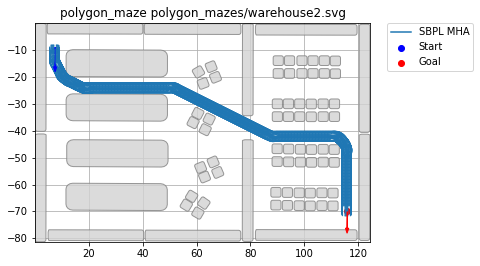

+++++++++++++++++++++++++ Run #0 (1 / 1) +++++++++++++++++++++++++
+ Steering:        CC Reeds-Shepp 
+ Environment:     polygon_maze polygon_mazes/warehouse2.svg
+ Planners:        SBPL_MHA
+ Found solution:  1 / 1
+ Exact solution:  1 / 1
+ Found colliding: 0 / 1
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



In [35]:
scenarios = [
#   ("parking1", {"theta": 0, "x": 2, "y": -7.27}, {"theta": -1.58, "x": 9, "y": -11.72}),
#   ("parking2", {"theta": -1.57, "x": 12, "y": -3}, {"theta": 0, "x": 2.5, "y": -7.27}),
#   ("parking3", {"theta": 0, "x": 27, "y": -15.7}, {"theta": 0, "x": 3.82, "y": -13.34}),
  ("warehouse", {"theta": -1.58, "x": 7.5, "y": -10}, {"theta": 1.58, "x": 76.5, "y": -10}, "polygon_mazes/warehouse_robot.svg"),
  ("warehouse2", {"theta": -1.58, "x": 7.5, "y": -10}, {"theta": -1.58, "x": 116, "y": -70}, "polygon_mazes/warehouse_robot.svg")
]

list(map(lambda x: visualize(*x), scenarios));